In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,  RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("C:/Users/dielo/student_habits_performance.csv")

In [3]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')

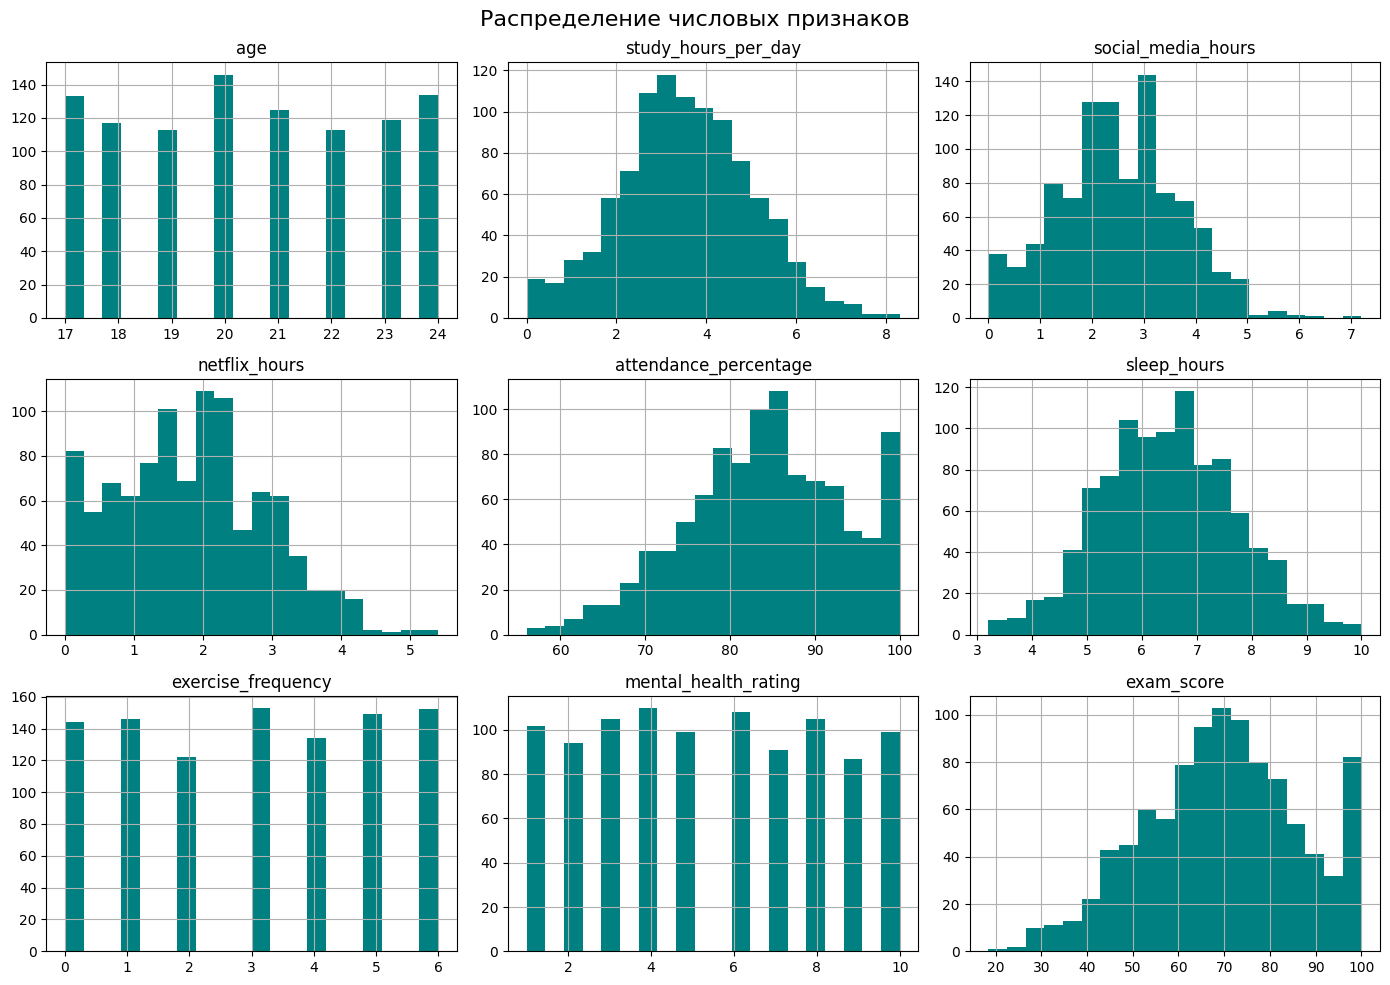

In [6]:
num_cols = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'exam_score'
]

df[num_cols].hist(figsize=(14, 10), bins=20, color='teal')
plt.suptitle("Распределение числовых признаков", fontsize=16)
plt.tight_layout()
plt.show()

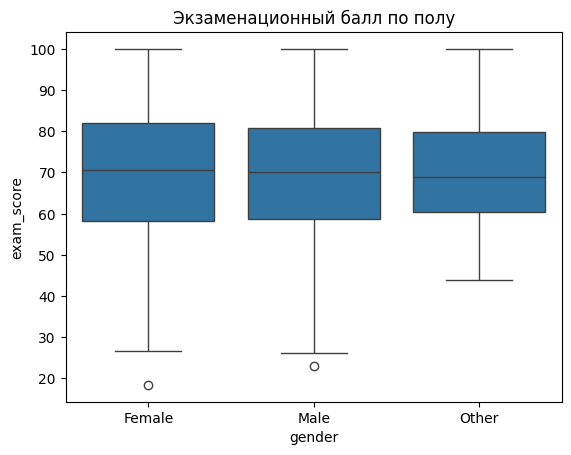

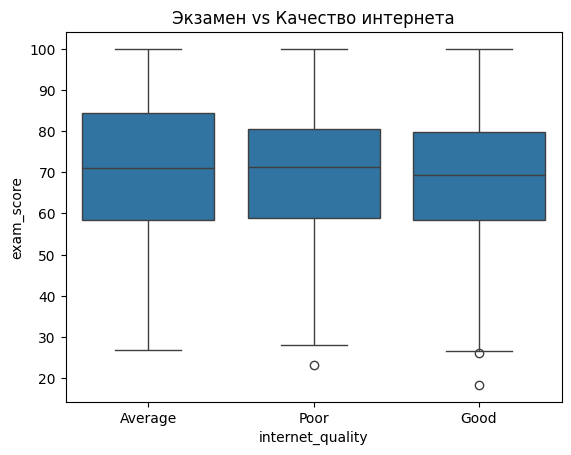

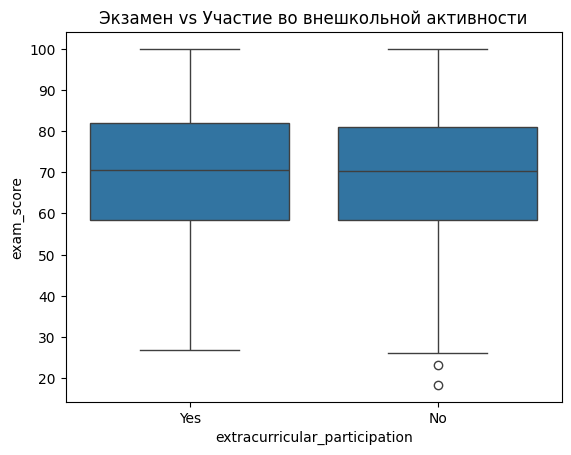

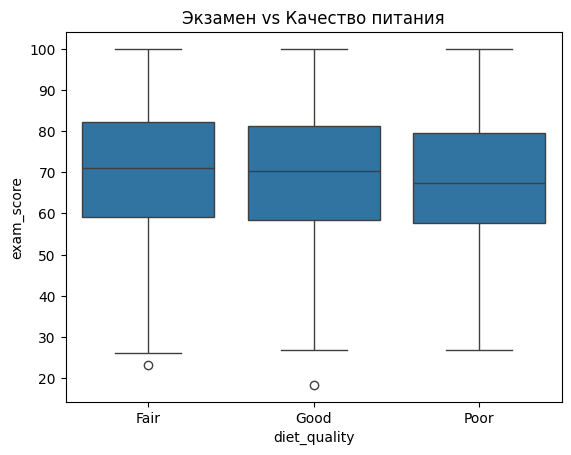

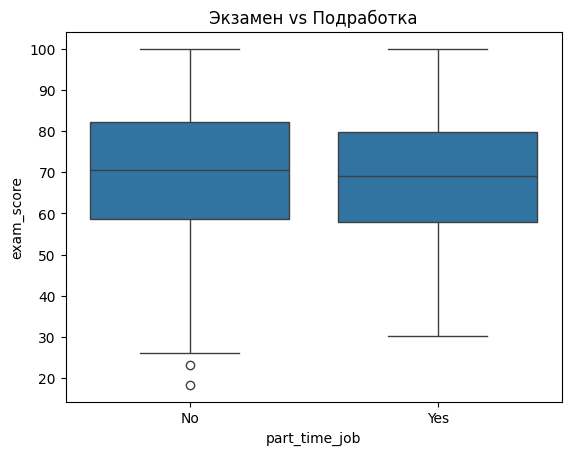

In [7]:
# Пол и экзамен
sns.boxplot(x='gender', y='exam_score', data=df)
plt.title('Экзаменационный балл по полу')
plt.show()

# Качество интернета и экзамен
sns.boxplot(x='internet_quality', y='exam_score', data=df)
plt.title('Экзамен vs Качество интернета')
plt.show()

# Внешкольные занятия и экзамен
sns.boxplot(x='extracurricular_participation', y='exam_score', data=df)
plt.title('Экзамен vs Участие во внешкольной активности')
plt.show()

# Диета и экзамен
sns.boxplot(x='diet_quality', y='exam_score', data=df)
plt.title('Экзамен vs Качество питания')
plt.show()

# Наличие подработки и экзамен
sns.boxplot(x='part_time_job', y='exam_score', data=df)
plt.title('Экзамен vs Подработка')
plt.show()

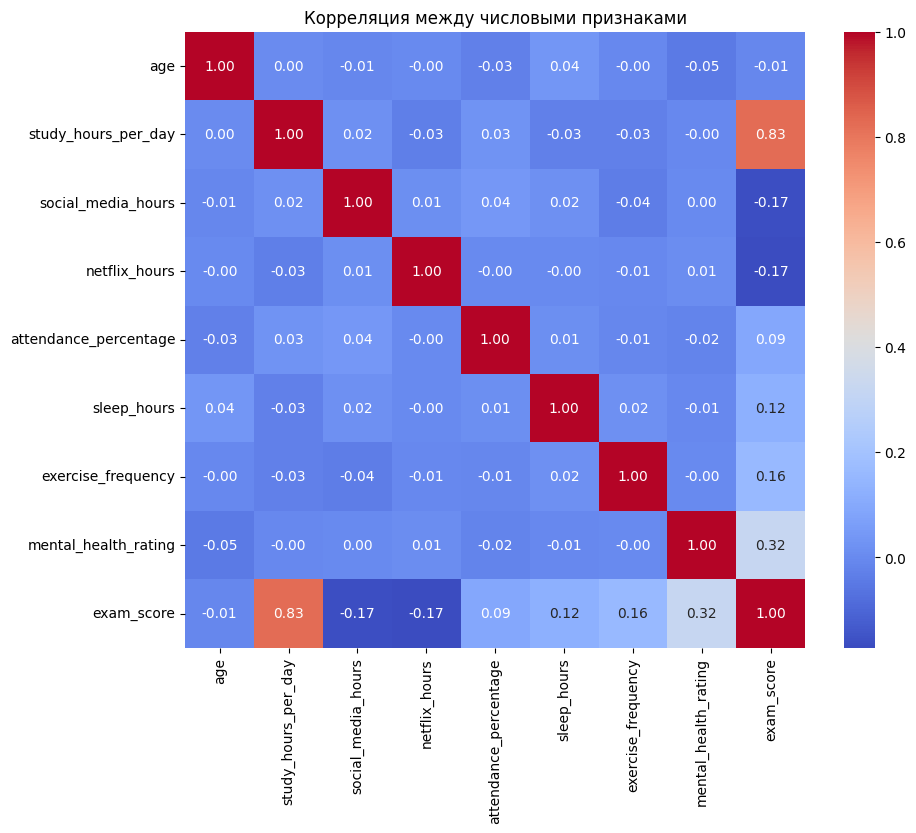

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция между числовыми признаками")
plt.show()

In [11]:
features = df.drop(columns=['student_id', 'exam_score'])
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = features.select_dtypes(include=['object']).columns.tolist()

In [12]:
X = features
y = df['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [22]:
models = {
    "Linear Regression": {
        "model": Pipeline([
            ('preprocess', preprocessor),
            ('reg', LinearRegression())
        ]),
        "params": {}
    },
    "Decision Tree": {
        "model": Pipeline([
            ('preprocess', preprocessor),
            ('reg', DecisionTreeRegressor(random_state=42))
        ]),
        "params": {
            'reg__max_depth': [3, 5, 10, None],
            'reg__min_samples_split': [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": Pipeline([
            ('preprocess', preprocessor),
            ('reg', RandomForestRegressor(random_state=42))
        ]),
        "params": {
            'reg__n_estimators': [50, 100, 200, 300],
            'reg__max_depth': [5, 10, 15, 20, None]
        }
    },
    "Gradient Boosting": {
        "model": Pipeline([
            ('preprocess', preprocessor),
            ('reg', GradientBoostingRegressor(random_state=42))
        ]),
        "params": {
            'reg__n_estimators': [100, 200, 300],
            'reg__learning_rate': [0.02, 0.05, 0.1],
            'reg__max_depth': [1, 3, 5]
        }
    }
}

results = []

for name, config in models.items():
    print(f"\nОбучение модели: {name}")
    grid = GridSearchCV(
        config["model"],
        config["params"],
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    grid.fit(X, y)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X)

    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print(f"Лучшая модель: {grid.best_params_}")
    print(f"R2: {r2:.3f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    results.append({
        "Model": name,
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse
    })


results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
display(results_df)


Обучение модели: Linear Regression
Лучшая модель: {}
R2: 0.902, MAE: 4.20, RMSE: 5.29

Обучение модели: Decision Tree
Лучшая модель: {'reg__max_depth': 5, 'reg__min_samples_split': 2}
R2: 0.830, MAE: 5.53, RMSE: 6.97

Обучение модели: Random Forest
Лучшая модель: {'reg__max_depth': 15, 'reg__n_estimators': 200}
R2: 0.981, MAE: 1.86, RMSE: 2.33

Обучение модели: Gradient Boosting
Лучшая модель: {'reg__learning_rate': 0.1, 'reg__max_depth': 1, 'reg__n_estimators': 300}
R2: 0.914, MAE: 4.00, RMSE: 4.96


,Model,R2,MAE,RMSE
2,Random Forest,0.980915,1.864820,2.331980
3,Gradient Boosting,0.913800,3.997694,4.955988
0,Linear Regression,0.901845,4.200019,5.288477
1,Decision Tree,0.829565,5.534503,6.968745


C:\Users\dielo\AppData\Local\Temp\ipykernel_37044\4113408836.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15), palette="Blues_d")


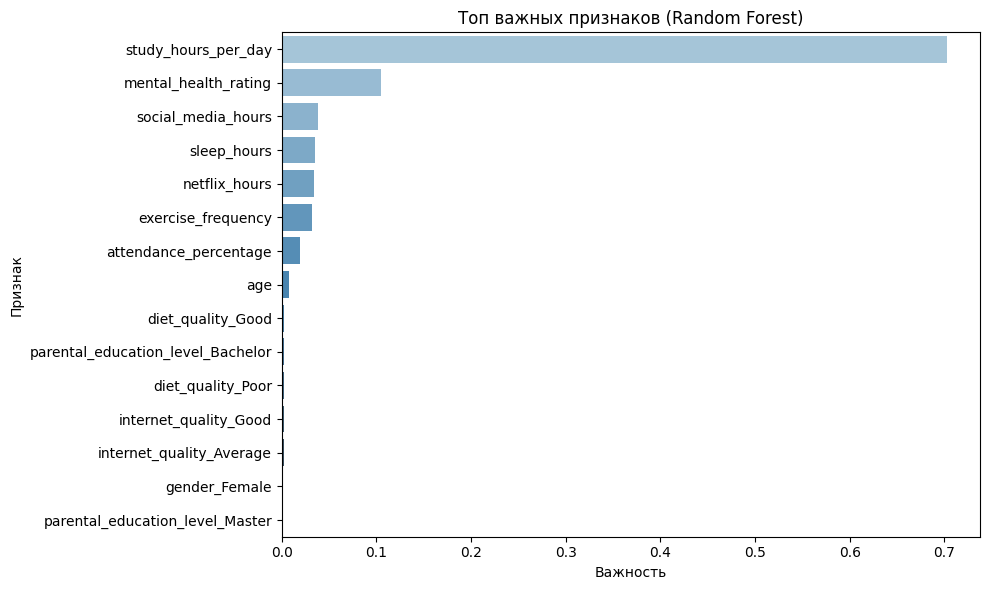

In [24]:
best_model = Pipeline([
    ('preprocess', preprocessor),
    ('reg', RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42))
])

best_model.fit(X, y)
encoder = best_model.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_features = encoder.get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, encoded_cat_features])

importances = best_model.named_steps['reg'].feature_importances_

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15), palette="Blues_d")
plt.title("Топ важных признаков (Random Forest)")
plt.xlabel("Важность")
plt.ylabel("Признак")
plt.tight_layout()
plt.show()

In [60]:
df['exam_level'] = pd.qcut(df['exam_score'], q=3, labels=[0, 1, 2])
y = df['exam_level']
X = df.drop(columns=['student_id', 'exam_level', 'exam_score'])

In [61]:
cat_features = X.select_dtypes(include='object').columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

models = {
    "KNearest": {
        "model": Pipeline([
            ('prep', preprocessor),
            ('clf', KNeighborsClassifier())
        ]),
        "params": {
            'clf__n_neighbors': [3, 5, 7, 9, 11, 15],
            'clf__weights': ['uniform', 'distance']
        }
    },
    "Logistic Regression": {
        "model": Pipeline([
            ('prep', preprocessor),
            ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
        ]),
        "params": {
            'clf__C': [0.1, 0.5, 1.0, 2, 10, 100]
        }
    },
    "Decision Tree": {
        "model": Pipeline([
            ('prep', preprocessor),
            ('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
        ]),
        "params": {
            'clf__max_depth': [3, 5, 10, 20, 30],
            'clf__min_samples_split': [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": Pipeline([
            ('prep', preprocessor),
            ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
        ]),
        "params": {
            'clf__n_estimators': [25, 50, 100, 200, 300],
            'clf__max_depth': [3, 5, 10, 15, 20]
        }
    },
    "Gradient Boosting": {
        "model": Pipeline([
            ('prep', preprocessor),
            ('clf', GradientBoostingClassifier(random_state=42))
        ]),
        "params": {
            'clf__n_estimators': [100, 200],
            'clf__learning_rate': [0.05, 0.1, 0.2],
            'clf__max_depth': [3, 5]
        }
    }
}


Обучение модели: KNearest
Лучшие параметры: {'clf__n_neighbors': 11, 'clf__weights': 'distance'}
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        60
           1       0.61      0.65      0.63        78
           2       0.79      0.71      0.75        62

    accuracy                           0.70       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.71      0.70      0.71       200



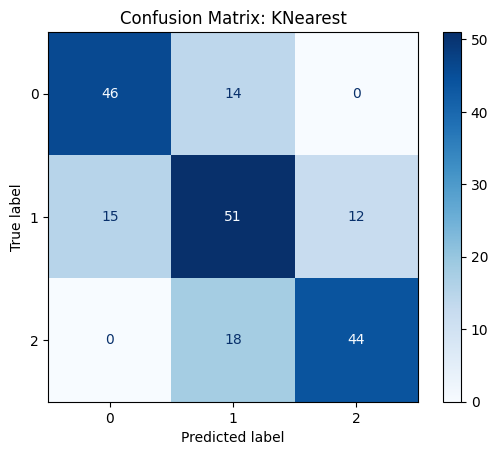


Обучение модели: Logistic Regression
Лучшие параметры: {'clf__C': 0.5}
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.76      0.78      0.77        78
           2       0.86      0.79      0.82        62

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



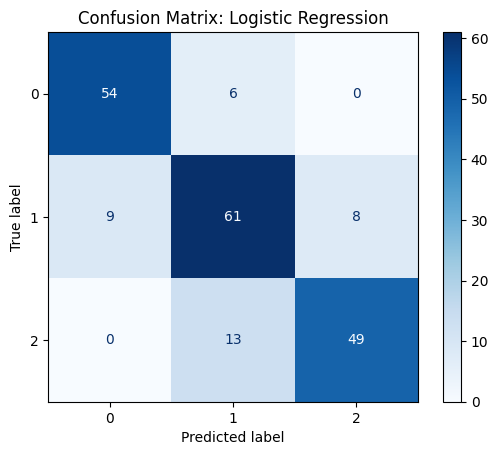


Обучение модели: Decision Tree
Лучшие параметры: {'clf__max_depth': 5, 'clf__min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        60
           1       0.64      0.68      0.66        78
           2       0.75      0.66      0.70        62

    accuracy                           0.72       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.73      0.72      0.72       200



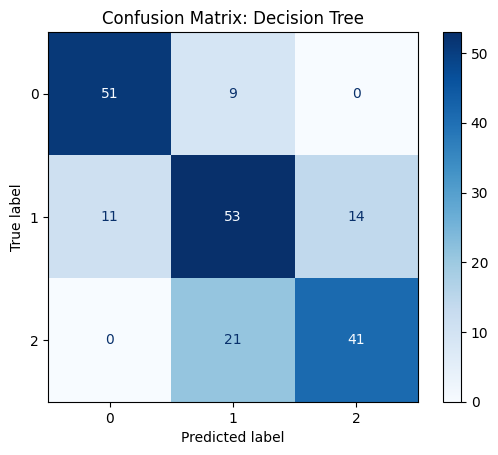


Обучение модели: Random Forest
Лучшие параметры: {'clf__max_depth': 15, 'clf__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        60
           1       0.66      0.58      0.62        78
           2       0.74      0.73      0.73        62

    accuracy                           0.72       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.71      0.72      0.71       200



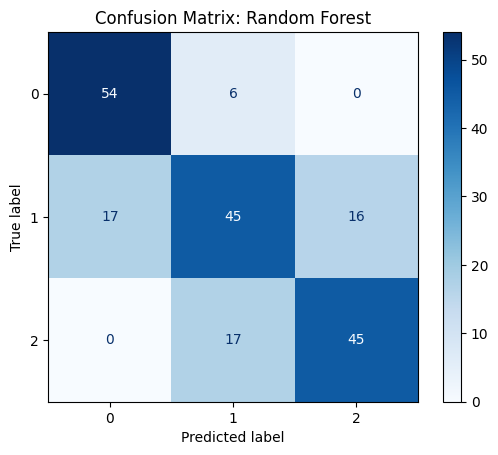


Обучение модели: Gradient Boosting
Лучшие параметры: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        60
           1       0.71      0.63      0.67        78
           2       0.77      0.77      0.77        62

    accuracy                           0.76       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.75      0.76      0.75       200



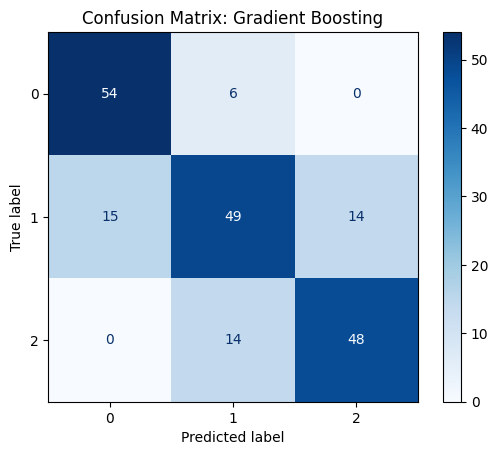

In [67]:
results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, config in models.items():
    print(f"\nОбучение модели: {name}")
    
    grid = GridSearchCV(
        config['model'],
        config['params'],
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')

    print("Лучшие параметры:", grid.best_params_)
    print(classification_report(y_test, y_pred))

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1_score": f1,
        "Precision": prec,
        "Recall": rec
    })

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

In [68]:
results_df = pd.DataFrame(results).sort_values(by="F1_score", ascending=False)
display(results_df)

,Model,Accuracy,F1_score,Precision,Recall
1,Logistic Regression,0.820,0.819848,0.821009,0.820
4,Gradient Boosting,0.755,0.751163,0.751739,0.755
2,Decision Tree,0.725,0.724855,0.726901,0.725
3,Random Forest,0.720,0.714568,0.714946,0.720
0,KNearest,0.705,0.706366,0.709439,0.705
